In [2]:
import networkx as nx
import sys
sys.path.append(r'c:\\Users\\rotim\\OneDrive\\Documents\\Reading\\graph-code\\Skoltech-PhD-Thesis\\_codes\\SIR\\Influential-nodes-identification-in-complex-networks-via-information-entropy')
from algorithms import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pickle

In [18]:
data = 'topo'# 'amazon'
data_file = data
G = clean_data(data_file)


In [22]:
r = [0.5, 0.1, 0.15, 0.2, 0.25, 0.3]
topk_list = [round(nx.number_of_nodes(G) * k) for k in r]
# print(topk_list)

In [23]:
max_ = r[-1]
max_topk = round(max_ * nx.number_of_nodes(G))
print(max_topk)

degreerank = degree(G, max_topk)
print('done!')
degreerank_non = degree_non(G, max_topk)
print('done!')

# vote = voterank(G, max_topk)
# print('done!')
# vote_non = voterank_non(G, max_topk)
# print('done!')

newmethod_rank = EnRenewRank(G, max_topk, 2)
print('done!')

kshell_rank = kshell(G, max_topk)
print('done!')
kshell_rank_non = kshell_non(G, max_topk)
print('done!')

10
done!
done!
done!
done!
done!


## compute the average shortest path in the initial node set

In [13]:
degree_ls = []
degree_non_ls = []
voterank_ls = []
voterank_non_ls = []
new_methed_ls = []
new_methed_non_ls = []
kshell_ls = []
kshell_non_ls = []
    
for k in tqdm(topk_list):
    topk = k
    degree_ls.append(get_ls(G, [x[0] for x in degreerank[:topk]]))
    degree_non_ls.append(get_ls(G, [x[0] for x in degreerank_non[:topk]]))
    # voterank_ls.append(get_ls(G, [x[0] for x in vote[:topk]]))
    # voterank_non_ls.append(get_ls(G, [x[0] for x in vote_non[:topk]]))
    new_methed_ls.append(get_ls(G, [x[0] for x in newmethod_rank[:topk]]))
    #new_methed_non_ls.append(get_ls(G, [x[0] for x in newmethod_rank_non[:topk]]))
    kshell_ls.append(get_ls(G, [x[0] for x in kshell_rank[:topk]]))
    kshell_non_ls.append(get_ls(G, [x[0] for x in kshell_rank_non[:topk]]))


100%|██████████| 6/6 [09:31<00:00, 95.27s/it] 


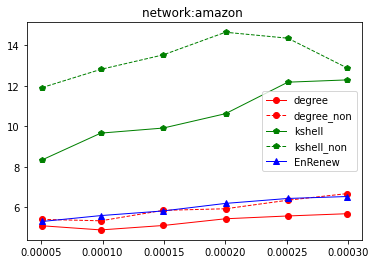

In [22]:
%matplotlib inline
plt.title('network:{} '.format(data_file))
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degree_ls, 'r-o', label='degree', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), degree_non_ls, 'r--o', label='degree_non', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), voterank_ls, 'y-s', label='vote', linewidth=1.0, )
#plt.plot(np.array(topk_list) / nx.number_of_nodes(G), voterank_non_ls, 'y--s', label='vote_non', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_ls, 'g-p', label='kshell', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), kshell_non_ls, 'g--p', label='kshell_non', linewidth=1.0, )
plt.plot(np.array(topk_list) / nx.number_of_nodes(G), new_methed_ls, 'b-^', label='EnRenew', linewidth=1.0, )
# plt.plot(np.array(topk_list) / nx.number_of_nodes(G), new_methed_non_ls, 'b--^', label='EnRenew_non', linewidth=1.0, )
plt.legend()
plt.show()